#Data Loading


In [1]:
#importing necessery libraries for future analysis of the dataset
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plt
import seaborn as sns


In [3]:
#Read data
ubahn=pd.read_json("/workspaces/MaennerML/Data/ubahn.json")
fahrrad = pd.read_json("/workspaces/MaennerML/Data/fahrrad.json")
"""
fahrrad1 = pd.read_csv("/workspaces/MaennerML/Data/Fahrrad/Location1.csv")
fahrrad2 = pd.read_csv("/workspaces/MaennerML/Data/Fahrrad/Location2.csv")
fahrrad3 = pd.read_csv("/workspaces/MaennerML/Data/Fahrrad/Location3.csv")
fahrrad4 = pd.read_csv("/workspaces/MaennerML/Data/Fahrrad/Location4.csv")
fahrrad5 = pd.read_csv("/workspaces/MaennerML/Data/Fahrrad/Location5.csv")
"""

In [12]:
#Check data
ubahn.head()
fahrrad.head()
#Combine data
df = [ubahn, fahrrad]
df = pd.concat(df)
df['Type'].unique


<bound method Series.unique of 144199      uBahn
144200      uBahn
144201      uBahn
144202      uBahn
144203      uBahn
           ...   
80        Fahrrad
81        Fahrrad
82        Fahrrad
83        Fahrrad
84        Fahrrad
Name: Type, Length: 723, dtype: object>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 723 entries, 144199 to 84
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       723 non-null    int64  
 1   seconds_elapsed            723 non-null    float64
 2   altitude                   723 non-null    float64
 3   speedAccuracy              723 non-null    float64
 4   bearingAccuracy            723 non-null    float64
 5   latitude                   723 non-null    float64
 6   altitudeAboveMeanSeaLevel  723 non-null    float64
 7   bearing                    723 non-null    float64
 8   horizontalAccuracy         723 non-null    float64
 9   verticalAccuracy           723 non-null    float64
 10  longitude                  723 non-null    float64
 11  speed                      723 non-null    float64
 12  Type                       723 non-null    object 
 13  index                      85 non-null     float64


<Axes: xlabel='speed', ylabel='Type'>

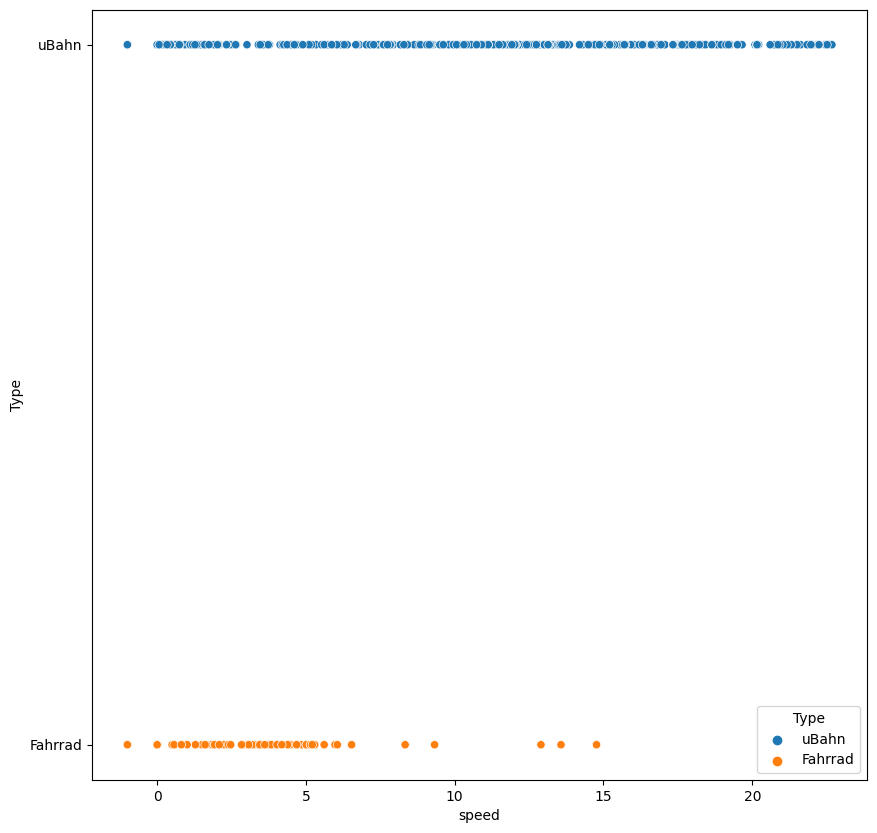

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(x='speed', y='Type', hue='Type', data=df)

#Feature Engineering


**Correlation Matrix**

Its necessary to remove correlated variables to improve your model. One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using plotly express.


Lighter shades represents positive correlation, when one variable increases, the other variable tends to increase

Darker shades represents negative correlation, when one variable increases, the other variable tends to decrease

In [78]:
px.imshow(location_uBahn.corr(),title="Correlation Plot")

<ipython-input-78-2bb7a848ff27>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



To read: [Fundamental Techniques of Feature Engineering for Machine Learning](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114)



#NEXT STEP
Separating labels and predictors

```
X=df.drop('location',axis=1)
y=df['location'].values
```
Splitting train (75%) and test set (25%)

```
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
```
Selecting categorical dataframe in train set
```
X_train_cat=df.select_dtypes(exclude=['number'])
```
Translate transport type into numerical values. For example: auto as 0, bus as 1, ubahn as 2, fahrrad as 3

Applying label encoding for categorical features in train set
```
importing label encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_train_cat=X_train_cat.apply(LabelEncoder().fit_transform)
```
Importing ColumnTransformer and OneHotEncoder
```
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
```

Separating numerical and categorical attributes in the train set
```
num_attribs = list (X_train_num)
cat_attribs = list (X_train_cat)
```
Creating a full pipeline: numerical + categorical
```
full_pipeline = ColumnTransformer([("num",num_pipeline,num_attribs),("cat",```OneHotEncoder(handle_unknown='ignore'),cat_attribs)])
```

Fit and transform the train set using the full pipeline
```
X_train_prepd = full_pipeline.fit_transform(X_train)
```


To do:

Location_bus,

Location_fahhrad,

Location_auto

Imputation: Fill in values of altitudeAboveMeanSeaLevel


